In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
energy_data = pd.read_csv('energydata_complete.csv')

In [3]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [5]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [6]:
#energy_data.isnull().sum()

In [7]:
energy_data.drop(['date', 'lights'],axis=1, inplace=True)

In [8]:
energy_data.head(2)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [10]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
features_df = normalised_df.drop(columns='Appliances')
heating_target = normalised_df['Appliances']


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
features_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [12]:
#Now, we split our dataset into the training and testing dataset. Recall that wehad earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(X_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(X_test)


In [14]:
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

Text(0, 0.5, 'Predicted Y')

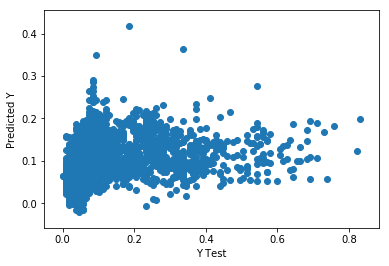

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,predicted_values)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [16]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063


0.05

In [17]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.823

45.348

In [19]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

RMSE: 0.0875144494766171


In [20]:
# The coefficients
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [22]:
coeffecients = pd.DataFrame(linear_model.coef_, features_df.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
T1,-0.003281
RH_1,0.553547
T2,-0.236178
RH_2,-0.456698
T3,0.290627
RH_3,0.096048
T4,0.028981
RH_4,0.026386
T5,-0.015657
RH_5,0.016006


In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)
predict = ridge_reg.predict(X_test)

In [27]:
predict

array([0.03321872, 0.24043824, 0.03461337, ..., 0.06872351, 0.10025536,
       0.05851175])

In [28]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

RMSE: 0.08753385704628004


In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
prediction = lasso_reg.predict(X_test)

In [31]:
prediction


array([0.07370267, 0.08143458, 0.07716072, ..., 0.07792848, 0.09034412,
       0.08359255])

In [32]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 0.09358170467245137


In [33]:
# The coefficients
print('Coefficients: \n', lasso_reg.coef_)

Coefficients: 
 [ 0.          0.01787993  0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.00011004 -0.         -0.
  0.         -0.         -0.04955749  0.00291176  0.          0.
 -0.         -0.        ]


In [34]:
coeffecients = pd.DataFrame(lasso_reg.coef_, features_df.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
T1,0.000000
RH_1,0.017880
T2,0.000000
RH_2,-0.000000
T3,0.000000
RH_3,0.000000
T4,-0.000000
RH_4,0.000000
T5,-0.000000
RH_5,0.000000


In [ ]:
\